<a href="https://colab.research.google.com/github/vitorsr/ccd/blob/master/forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from fbprophet import Prophet
from datetime import datetime, date
import matplotlib.pyplot as plt
import matplotlib.markers as mks

In [0]:
# Importando apenas as colunas id, date e tmax
tmax_inmetr_df = pd.read_csv("https://onedrive.live.com/download?cid=BCBADB0836C97273&resid=BCBADB0836C97273%21115090&authkey=AHJ7x3UN1MzJW1M")[['id', 'date', 'tmax']]

In [0]:
# Filtrando as linhas pertencentes a medições da estação de Migrante de Santana (SP)
# Migrante de Santana foi escolhida porque é a principal estação meteorológica do Instituto Nacional de Meteorologia (INMET)
migrante_df = tmax_inmetr_df[tmax_inmetr_df['id'] == 83781]

In [0]:
# Removendo as linhas com temperaturas NaN
tmax_migrante_df = migrante_df[migrante_df['tmax'].notnull()]

In [0]:
# Criando o dataframe a ser passado como parâmetro
prophet_df = tmax_migrante_df[['date', 'tmax']]
prophet_df.columns = ['ds', 'y']

In [6]:
# Instanciando um objeto da classe Prophet e chamando seu método fit com o dataframe supracitado.
m = Prophet()
m.fit(prophet_df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
# Criando dataframe de previsão para o ano de 2019.
future = m.make_future_dataframe(periods=365)
# Usando o método predict para fazer a previsão.
forecast = m.predict(future)

In [0]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

In [0]:
# Baixando as medições da estação de Migrante de Santana (SP) em 2019 (01/01/2019 a 31/08/2019)
tmax_2019_migrante_df = pd.read_csv("https://raw.githubusercontent.com/vitorsr/ccd/master/data/83781.csv?token=AIYETSBAS4RNPRH5DEX3LRC5X4SY6")[['date', 'tmax']]

In [0]:
# Filtrando as medições de temperatura máxima e readequando a coluna de datas para corresponder ao formato do Prophet
tmax_2019_migrante_df = tmax_2019_migrante_df[tmax_2019_migrante_df.tmax != -9999.0]
tmax_2019_migrante_df['date'] = pd.to_datetime(tmax_2019_migrante_df['date']).dt.date

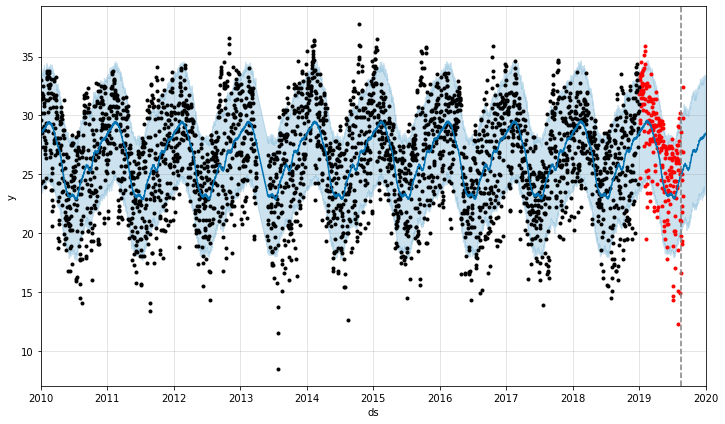

In [135]:
# Plot: 01/01/2010 a 01/01/2020
fig1 = m.plot(forecast)
ax = fig1.get_axes()
ax[0].set_xlim([datetime(2010,1,1).toordinal(), datetime(2020,1,1).toordinal()])
plt.scatter(tmax_2019_migrante_df['date'], tmax_2019_migrante_df['tmax'], color='red', marker='.')
idx = tmax_2019_migrante_df['date'][tmax_2019_migrante_df['date'] == date(2019, 8, 19)].index.values.astype(int)[0]
plt.axvline(tmax_2019_migrante_df['date'][idx], color='grey', linestyle='--')

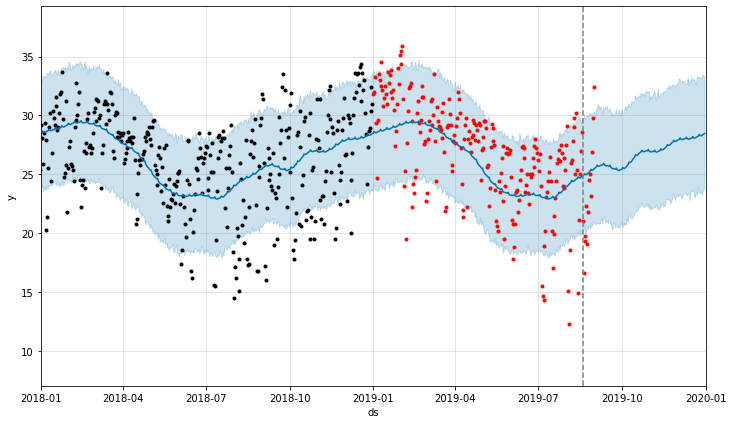

In [136]:
# Plot: 01/01/2018 a 01/01/2020
fig2 = m.plot(forecast)
ax = fig2.get_axes()
ax[0].set_xlim([datetime(2018,1,1).toordinal(), datetime(2020,1,1).toordinal()])
plt.scatter(tmax_2019_migrante_df['date'], tmax_2019_migrante_df['tmax'], color='red', marker='.')
idx = tmax_2019_migrante_df['date'][tmax_2019_migrante_df['date'] == date(2019, 8, 19)].index.values.astype(int)[0]
plt.axvline(tmax_2019_migrante_df['date'][idx], color='grey', linestyle='--')

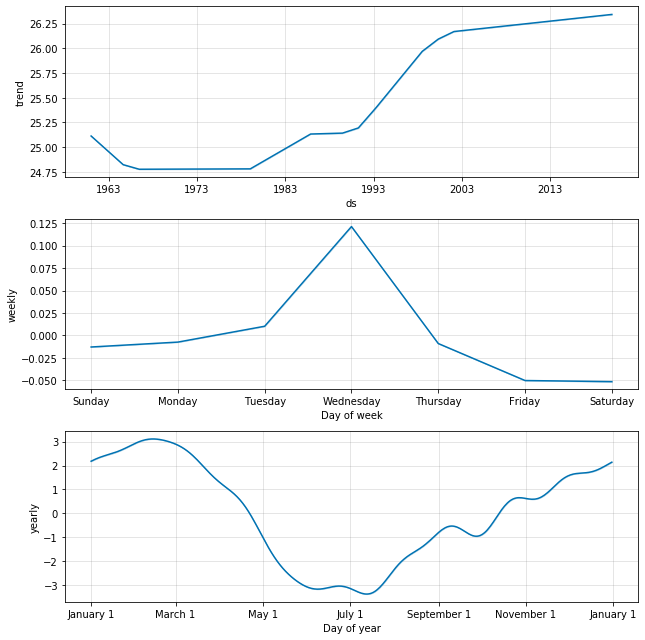

In [10]:
# Plot: Componentes do forecast
fig3 = m.plot_components(forecast)